In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

# print(zlevels)
# print(zlevels[0:20])
# print(zlevels[20:27])
# print(zlevels[27:40])

In [24]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_y2016m11d24.nc')
test_BC = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_carp_T_20190101-20190101.nc')
test_BC_grid = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_grid_T_20190101-20190101.nc')


In [60]:
test_DIC = np.squeeze(test_BC['dissolved_inorganic_carbon'][:,:,360:460,20])
test_TA = np.squeeze(test_BC['total_alkalinity'][:,:,360:460,20])
test_T = np.squeeze(test_BC_grid['votemper'][:,:,360:460,20])
test_S = np.squeeze(test_BC_grid['vosaline'][:,:,360:460,20])


1974.94
2305.49
2064.03
2317.41
6.995
9.21779
28.5562
33.911


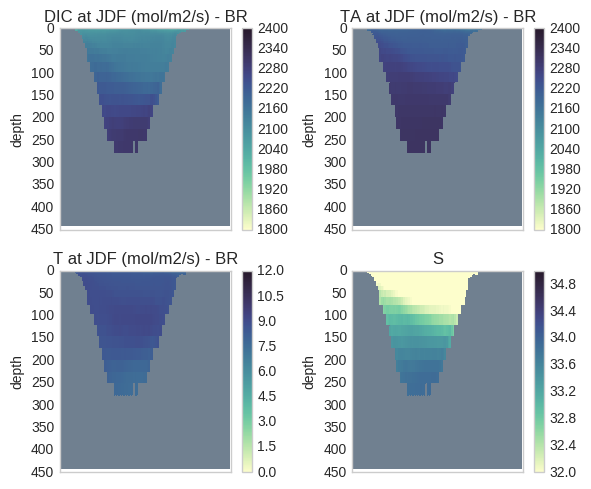

In [70]:
fig = plt.figure(figsize=(6,5))
nop = 4
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_DIC)
        tplt = np.ma.masked_values(sd,0)
        print(np.min(tplt))
        print(np.max(tplt))
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1800, vmax=2400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_TA)

        tplt = np.ma.masked_values(sd,0)
        print(np.min(tplt))
        print(np.max(tplt))
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=1800, vmax=2400)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('TA at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_T)
        tplt = np.ma.masked_values(sd,0)
        print(np.min(tplt))
        print(np.max(tplt))
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=12)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('T at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 4:
        ax = fig.add_subplot(2,nop/2,i)
        section_slice = np.arange(360, 460)
        sd = (test_S)
        tplt = np.ma.masked_values(sd,0)
        print(np.min(tplt))
        print(np.max(tplt))
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=32, vmax=35)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('S') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

plt.tight_layout()

In [62]:
dimen_bdy = np.shape(test_S)
print(dimen_bdy)
width_slice = dimen_bdy[1]
d = zlevels
depth_broad = np.empty((40, width_slice))
for b in range(0,width_slice):

    depth_broad[:,b] = zlevels
    
depth_broad2 = np.zeros((40, width_slice))

(40, 100)


In [63]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]


    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

In [64]:
pHr, OmAr, pco2r = oned_moxy(test_S, test_T, test_DIC, test_TA, 1, depth_broad)
pHr2, OmAr2, pco2r2 = oned_moxy(test_S, test_T, test_DIC, test_TA, 1, depth_broad2)

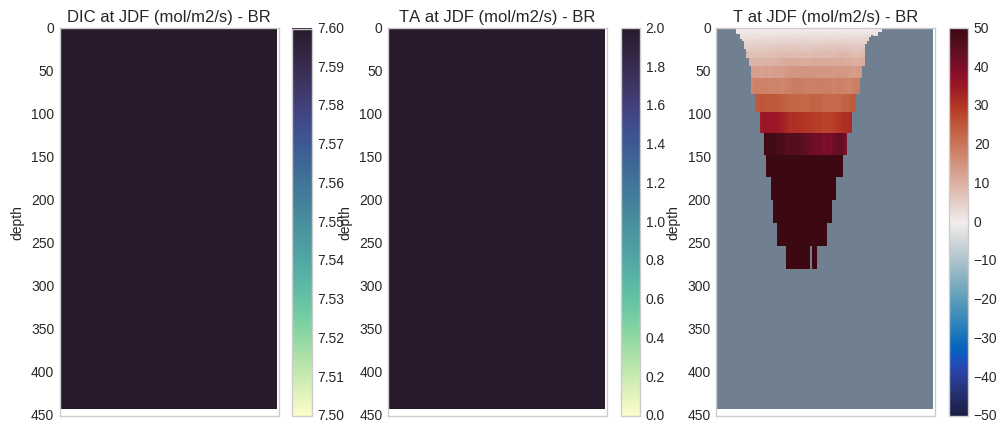

In [72]:
fig = plt.figure(figsize=(12,5))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r)
        tplt = np.ma.masked_values(sd,0)
        tplt = sd
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=7.5, vmax=7.6)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('TA at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r-pco2r2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-50, vmax=50)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('T at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])


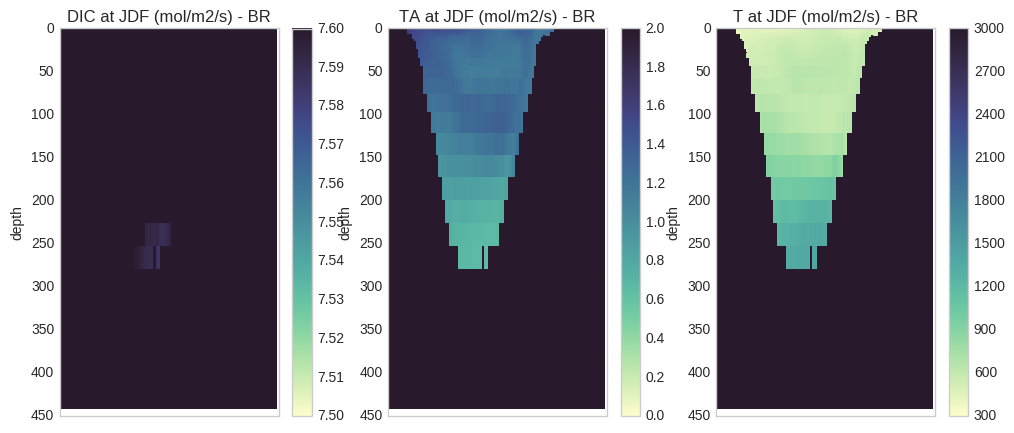

In [71]:
fig = plt.figure(figsize=(12,5))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pHr)
        tplt = np.ma.masked_values(sd,0)
        tplt = sd
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=7.5, vmax=7.6)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (OmAr)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('TA at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=300, vmax=3000)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('T at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])


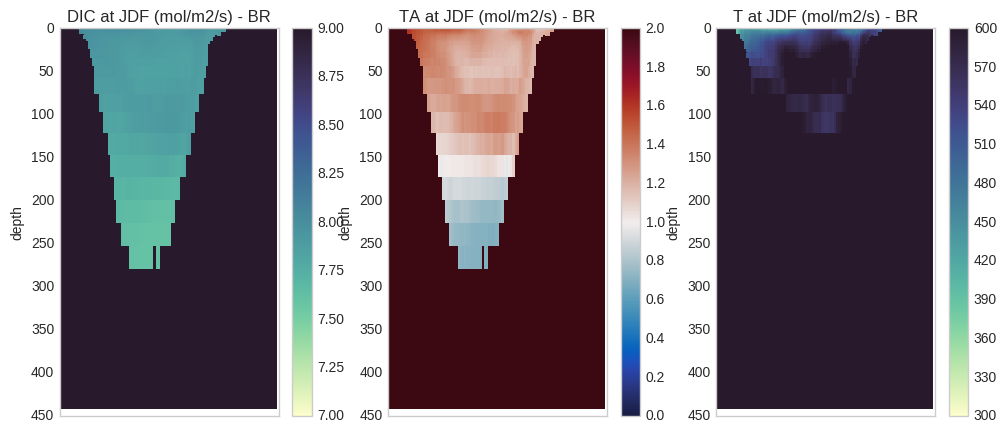

In [69]:
fig = plt.figure(figsize=(12,5))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pHr2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=7, vmax=9)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (OmAr2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('TA at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,nop,i)
        section_slice = np.arange(360, 460)
        sd = (pco2r2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=300, vmax=600)

        ax.invert_yaxis()
        land_colour = 'slategrey'
        cbar = fig.colorbar(mesh, ax=ax)
        cmap.set_bad(land_colour)
        plt.title('T at JDF (mol/m2/s) - BR') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
